# **Exercices Big Data** ISEN Lille 2018

## 1) King of the houses

Premières manipulations de dataframe & corrélations

### Importation des librairies

In [4]:
# Pandas : librairie de manipulation de données
import pandas as pd
# NumPy : librairie de calcul scientifique
import numpy as np
# MatPlotLib : librairie de visualisation et graphiques
from matplotlib import pyplot as plt
# SeaBorn : librairie de graphiques avancés
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

### Lecture du fichier CSV

In [5]:
# Imptation du dataset kc_house_data.csv
kc=pd.read_csv("responses.csv")

### Dataframe

In [4]:
# On visualise le début du dataframe
kc.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [5]:
# Ou la fin  dataframe
kc.tail()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


In [6]:
# Dimensions de la table
kc.shape

(1010, 150)

In [7]:
# Informations sur les types données
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


### Corélations

In [8]:
# On part à la recherche de corrélations (notamment entre le prix et d'autres variables, comme le nombre de chambres)
tabcorr = kc.corr(method='pearson')
# On s'intéresse juste au prix
correlations = tabcorr['Happiness in life']
# On enlève le calcul de corrélation prix/prix (obligatoirement égale à 1)
correlations = correlations.drop(['Happiness in life'],axis=0)
# On prend la valeur absolue (une correalation négative reste une corlation)
correlations = abs(correlations)
# On trie les valeurs par correlation croissante
correlations = correlations.sort_values(ascending=False)

print(correlations)

Energy levels                 0.440593
Loneliness                    0.437061
Changing the past             0.352469
Number of friends             0.320939
Personality                   0.304279
Mood swings                   0.238388
Interests or hobbies          0.236037
Dreams                        0.210415
Fun with friends              0.197328
New environment               0.192686
Fear of public speaking       0.180929
Socializing                   0.163988
Fake                          0.149493
Reliability                   0.144018
Economy Management            0.143627
Public speaking               0.141931
Active sport                  0.139799
Spending on healthy eating    0.135244
Prioritising workload         0.130482
Cars                          0.130159
Knowing the right people      0.128942
Healthy eating                0.128589
Life struggles                0.127577
Entertainment spending        0.126130
Assertiveness                 0.122393
Parents' advice          

On remarque que la plus forte corrélation concerne le niveau d'énergie. 
Par contre, la musique classique ou l'empathie sont assez peu corrélés à la joie de vivre.

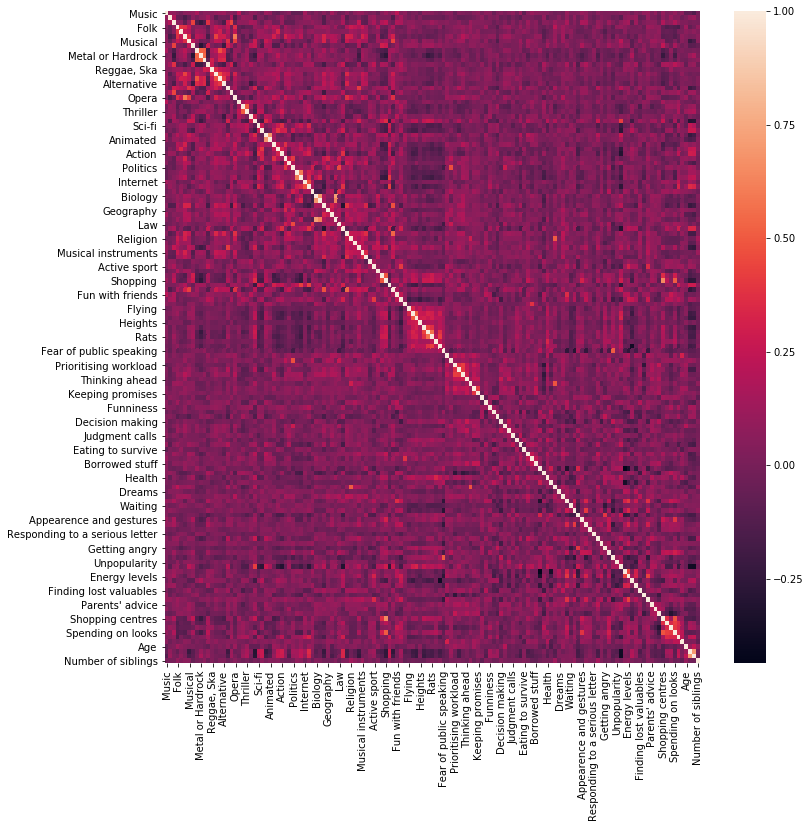

In [9]:
# On visualise les corrélations grâce à une "carte de températures" (via seaborn)
plt.figure(figsize=(12,12))
sns.heatmap(kc.corr())

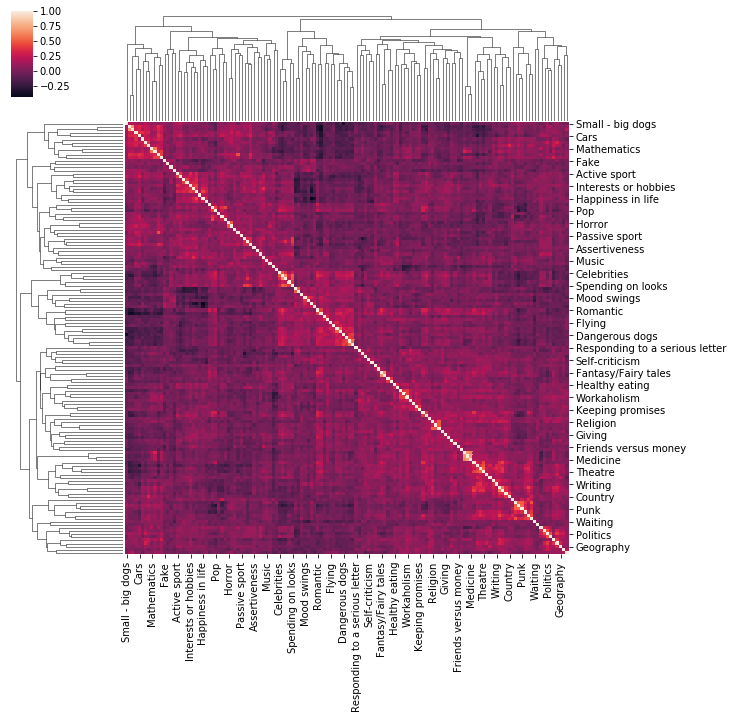

In [10]:
# Ou regroupés par clusters:
sns.clustermap(kc.corr())

In [11]:
# On peut visualiser tous les nuagese pointspar paire de paramètres :
# les opérations sont lourdes et les paramètres nuombreux, l'affichage peut prendre du temps
# sns.pairplot(kc)

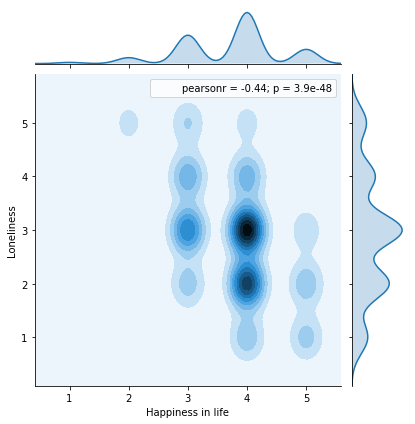

In [12]:
# On peut également tracer une estimation de la densité de probabilité d'un varaible :
print(sns.jointplot(kc['Happiness in life'], kc['Loneliness'], kind='kde'))

In [13]:
print(kc.info())
kc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [6]:
# On enlève les colonnes qui ne sont pas au bon format
kc = kc.drop(['Left - right handed'], axis =1)
kc = kc.drop(['Education'], axis =1)
kc = kc.drop(['Only child'], axis =1)
kc = kc.drop(['Village - town'], axis =1)
kc = kc.drop(['House - block of flats'], axis =1)

In [7]:
kc = kc.drop(['Gender'], axis =1)

In [8]:
kc = kc.drop(['Smoking'], axis =1)
kc = kc.drop(['Alcohol'], axis =1)
kc = kc.drop(['Punctuality'], axis =1)
kc = kc.drop(['Lying'], axis =1)
kc = kc.drop(['Internet usage'], axis =1)
kc.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0


In [9]:
data_train = kc.sample(frac=0.8)         # 80% des données avec frac=0.8
data_test = kc.drop(data_train.index)    # le reste des données pour le test

data_train = data_train.as_matrix().astype(np.float)
data_test = data_test.as_matrix().astype(np.float)